In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# function to extract number of words in scene

def extract_scene_lengths(file_path):
    # read every line separately
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # join lines again without first line
    text = ''.join(lines[1:])

    # split text at scene separator
    scenes = text.split('=' * 50)
    # split scene text and count length
    scene_lengths = [len(scene.strip().split()) for scene in scenes if scene.strip()]
    
    return scene_lengths

In [3]:
# function to get mean length of scenes and standard variation from mean

def analyze_scene_lengths(scene_lengths):
    
    # calculate mean scene length and standard deviation (amount of variation of scene lengths from the mean)
    mean_length = np.mean(scene_lengths)
    std_length = np.std(scene_lengths)
    
    return mean_length, std_length

In [4]:
# function to classify scripts into coherent or incoherent by calculating coefficient of variation

def coherence_classifier(mean_length, std_length, threshold=2.45):
    # coefficient of variation (std / mean) provides standardized way to check variability relative to mean
    coefficient_of_variation = std_length / mean_length
    print(f"Coefficient of Variation: {coefficient_of_variation}")
    
    if coefficient_of_variation < threshold:
        return "Coherent"
    else:
        return "Incoherent"

In [5]:
# function to process all screenplays

def process_scene_lengths(folder_path):
    all_scene_lengths = []
    coherence_counts = {"Coherent": 0, "Incoherent": 0}
    coefficients_of_variation = []
    
    # get all .txt files in folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

    # iterate over screenplays and classify coherence
    for filename in files:
        file_path = os.path.join(folder_path, filename)
        print(f"Processing file: {filename}")
        
        # extract scene lengths
        scene_lengths = extract_scene_lengths(file_path)
        all_scene_lengths.extend(scene_lengths)
        
        # analyze scene lengths
        mean_length, std_length = analyze_scene_lengths(scene_lengths)
        
        # calculate coefficient of variation
        coefficient_of_variation = std_length / mean_length
        coefficients_of_variation.append(coefficient_of_variation)
        
        # classify coherence
        coherence = coherence_classifier(mean_length, std_length)
        print(f"{filename}: {coherence}")
        
        # update coherence count
        coherence_counts[coherence] += 1
    
    print(f"Coherent screenplays: {coherence_counts['Coherent']}")
    print(f"Incoherent screenplays: {coherence_counts['Incoherent']}")
    
    return all_scene_lengths, coherence_counts, coefficients_of_variation

In [6]:
folder_path = 'data/screenplay_data/data/scene_separated_texts'
all_scene_lengths, coherence_counts, coefficients_of_variation = process_scene_lengths(folder_path)
print("Coefficients of Variation:", coefficients_of_variation)

Processing file: 10 Cloverfield Lane_1179933.txt
Coefficient of Variation: 2.2240982966924543
10 Cloverfield Lane_1179933.txt: Coherent
Processing file: 10 Things I Hate About You_0147800.txt
Coefficient of Variation: 2.5776272270182448
10 Things I Hate About You_0147800.txt: Incoherent
Processing file: 101 Days of 101 Dalmatians_0249328.txt
Coefficient of Variation: 3.607553600290022
101 Days of 101 Dalmatians_0249328.txt: Incoherent
Processing file: 12 Angry Men_0118528.txt
Coefficient of Variation: 1.8411058683963775
12 Angry Men_0118528.txt: Coherent
Processing file: 12 Monkeys_0114746.txt
Coefficient of Variation: 2.455494826167308
12 Monkeys_0114746.txt: Incoherent
Processing file: 12 Years a Slave_2024544.txt
Coefficient of Variation: 3.2624453564576292
12 Years a Slave_2024544.txt: Incoherent
Processing file: 127 Hours_1542344.txt
Coefficient of Variation: 3.4170572448283054
127 Hours_1542344.txt: Incoherent
Processing file: 13 13 13_2991516.txt
Coefficient of Variation: 2.1551

C:\Users\vandi\Documents\neue fische\Capstone-project\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\vandi\Documents\neue fische\Capstone-project\.venv\Lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\vandi\Documents\neue fische\Capstone-project\.venv\Lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\vandi\Documents\neue fische\Capstone-project\.venv\Lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\vandi\Documents\neue fische\Capstone-project\.venv\Lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in do

Coefficient of Variation: nan
53 1_4329278.txt: Incoherent
Processing file: 8 Mile_0298203.txt
Coefficient of Variation: 1.8182480302452422
8 Mile_0298203.txt: Coherent
Processing file: 84C MoPic_0096744.txt
Coefficient of Variation: 0.968921185019564
84C MoPic_0096744.txt: Coherent
Processing file: 8MM_0134273.txt
Coefficient of Variation: 4.425953372213825
8MM_0134273.txt: Incoherent
Processing file: 9 millimeter_0118542.txt
Coefficient of Variation: 4.425953372213825
9 millimeter_0118542.txt: Incoherent
Processing file: 9 to 5_0080319.txt
Coefficient of Variation: 2.321880865246704
9 to 5_0080319.txt: Coherent
Processing file: 99 Homes_2891174.txt
Coefficient of Variation: 3.3565749673690273
99 Homes_2891174.txt: Incoherent
Processing file: A Beautiful Day in the Neighborhood_3224458.txt
Coefficient of Variation: 3.422036441839666
A Beautiful Day in the Neighborhood_3224458.txt: Incoherent
Processing file: A Beautiful Mind_0268978.txt
Coefficient of Variation: 4.705690794631337
A Be

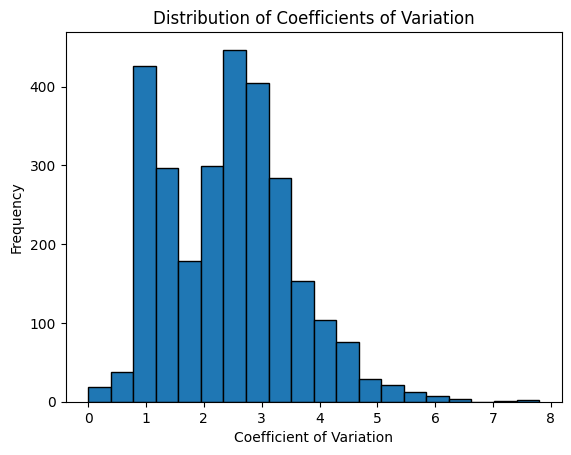

In [7]:
# histogram of coefficients of variation
plt.hist(coefficients_of_variation, bins=20, edgecolor='black')
plt.title("Distribution of Coefficients of Variation")
plt.xlabel("Coefficient of Variation")
plt.ylabel("Frequency")
plt.show()

In [8]:
import math

# filter out nan values from list
valid_coefficients_of_variation = [cv for cv in coefficients_of_variation if not math.isnan(cv)]

mean_cv = np.mean(valid_coefficients_of_variation)
std_cv = np.std(valid_coefficients_of_variation)
median_cv = np.median(valid_coefficients_of_variation)

print(f"Mean CV: {mean_cv}")
print(f"Standard Deviation of CV: {std_cv}")
print(f"Median CV: {median_cv}")

Mean CV: 2.424877040803324
Standard Deviation of CV: 1.103410880340077
Median CV: 2.4518861939434933
